In [ ]:
from abc import ABC, abstractmethod
import random
import numpy as np
import matplotlib.pyplot as plt

### Generating dataset

In [13]:
def generate_data(n=100):
    result = random.choices([0, 1], weights=[0.1, 0.9], k=n)
    result = np.array(result, dtype=float)
    result[result == 0] = np.random.normal(10, 1, len(result[result == 0]))
    result[result == 1] = np.random.normal(5, 1, len(result[result == 1]))
    return result

### Implementation

In [139]:
class kde:
    __slots__ = ["kernel_type", "bandwidth", "data", "n"]

    def __init__(self, kernel_type="gaussian", bandwidth=1):
        self.kernel_type = kernel_type
        self.bandwidth = bandwidth

    def fit(self, data):
        self.data = data
        self.n = len(data)

    @abstractmethod
    def gaussian_kernel(self, x, mean, std):
        return np.exp(-0.5 * ((x - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi))

    @abstractmethod
    def top_hat_kernel(self, x, mean, std):
        return (np.abs(x - mean) <= std) / (2 * std)

    @abstractmethod
    def epanechnikov_kernel(self, x, mean, std):
        return 3 / 4 * (1 - ((x - mean) / std) ** 2) * (np.abs(x - mean) <= std) / std

    @abstractmethod
    def exponential_kernel(self, x, mean, std):
        return np.exp(-np.abs(x - mean) / std) / (2 * std)

    def transform(self, x):
        solution = np.zeros(len(x))
        for data_point in self.data:
            if self.kernel_type == "gaussian":
                solution += self.gaussian_kernel(x, mean=data_point, std=self.bandwidth)
            elif self.kernel_type == "top_hat":
                solution += self.top_hat_kernel(x, mean=data_point, std=self.bandwidth)
            elif self.kernel_type == "epanechnikov":
                solution += self.epanechnikov_kernel(
                    x, mean=data_point, std=self.bandwidth
                )
            elif self.kernel_type == "exponential":
                solution += self.exponential_kernel(
                    x, mean=data_point, std=self.bandwidth
                )
            else:
                raise ValueError("Invalid kernel type")
        return solution / (self.n)

### Testing if everything is working correctly and intuitions

#### Kernels with n = 100

##### top hat

Text(0.5, 1.0, 'Kernel Density Estimation, Top Hat with bandwidth=1, n=100')

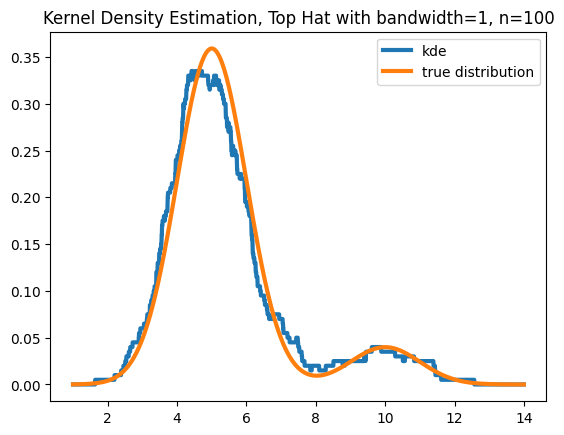

In [104]:
kd = kde(kernel_type="top_hat", bandwidth=1)

data = generate_data(100)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation, Top Hat with bandwidth=1, n=100")

##### epanechnikow

Text(0.5, 1.0, 'Kernel Density Estimation, Epanechnikov with bandwidth=1, n=100')

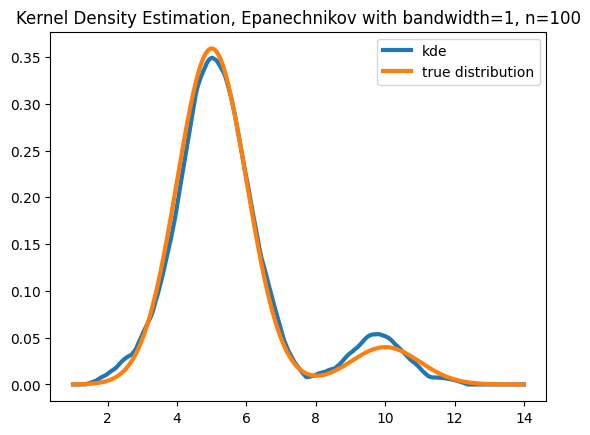

In [131]:
kd = kde(kernel_type="epanechnikov", bandwidth=1)

data = generate_data(100)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation, Epanechnikov with bandwidth=1, n=100")

##### exponential

Text(0.5, 1.0, 'Kernel Density Estimation, Exponential with bandwidth=0.4, n=100')

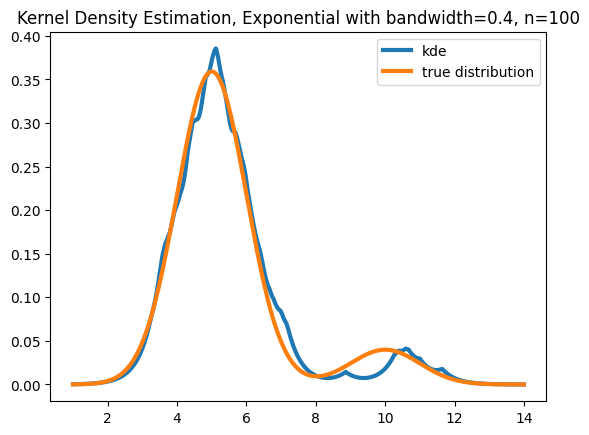

In [162]:
kd = kde(kernel_type="exponential", bandwidth=0.4)

data = generate_data(100)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation, Exponential with bandwidth=0.4, n=100")

##### gaussian

Text(0.5, 1.0, 'Kernel Density Estimation, Gaussian with bandwidth=0.5, n=100')

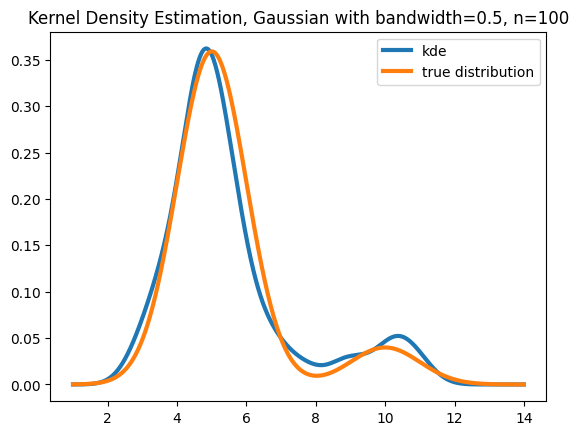

In [167]:
kd = kde(kernel_type="gaussian", bandwidth=0.5)

data = generate_data(100)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation, Gaussian with bandwidth=0.5, n=100")

All kernels works as intended, event thought I didn't show this phenomena I discovered that kernel type don't matter if sample size is big enough. Thats why I showed differences on n = 100. Then we can see various strategies of smoothing.

#### Intuitions (tested only on gaussian kernel)

Text(0.5, 1.0, 'Kernel Density Estimation with bandwidth=1, n=10000')

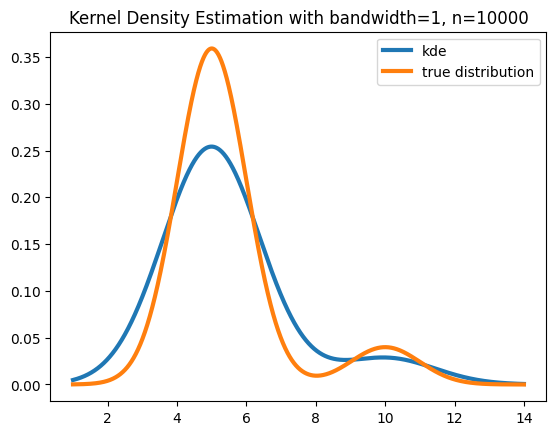

In [60]:
kd = kde(bandwidth=1)

data = generate_data(10000)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation with bandwidth=1, n=10000")

Text(0.5, 1.0, 'Kernel Density Estimation with bandwidth=3, n=10000')

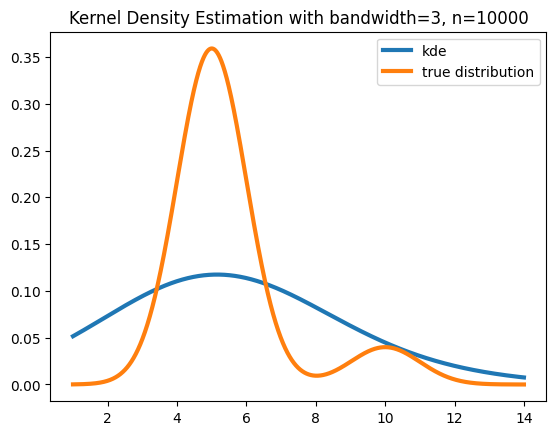

In [61]:
kd = kde(bandwidth=3)

data = generate_data(10000)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation with bandwidth=3, n=10000")

Text(0.5, 1.0, 'Kernel Density Estimation with bandwidth=0.5, n=10000')

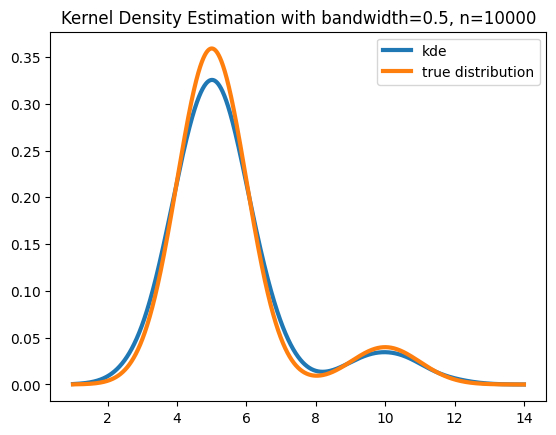

In [62]:
kd = kde(bandwidth=0.5)

data = generate_data(10000)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation with bandwidth=0.5, n=10000")

Text(0.5, 1.0, 'Kernel Density Estimation with bandwidth=0.2, n=10000')

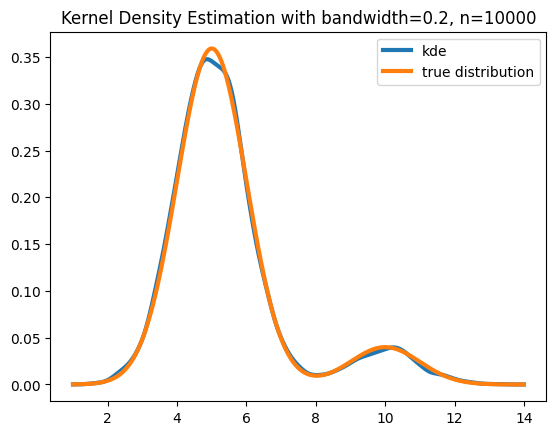

In [63]:
kd = kde(bandwidth=0.2)

data = generate_data(10000)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation with bandwidth=0.2, n=10000")

This configuration seems optimal. What will happened if I change size of input data

Text(0.5, 1.0, 'Kernel Density Estimation with bandwidth=0.2, n=100')

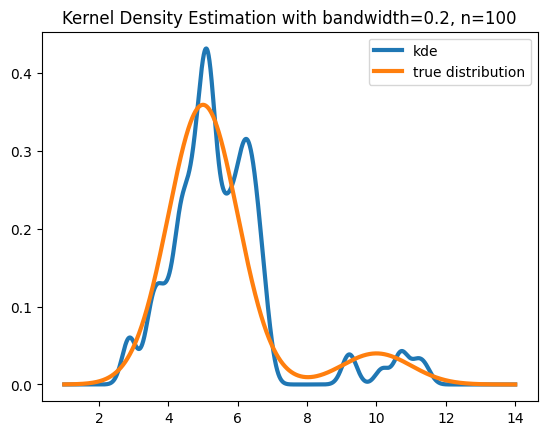

In [75]:
kd = kde(bandwidth=0.2)

data = generate_data(100)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation with bandwidth=0.2, n=100")

Text(0.5, 1.0, 'Kernel Density Estimation with bandwidth=0.4, n=100')

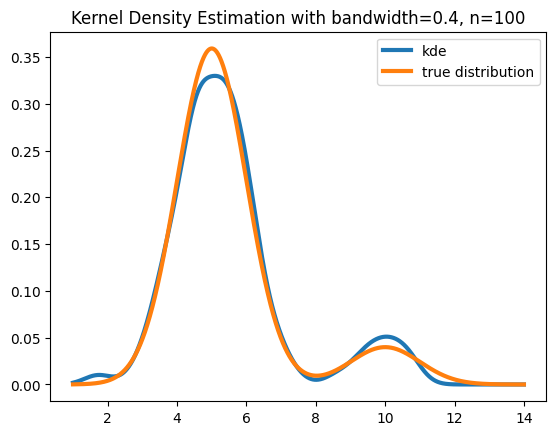

In [89]:
kd = kde(bandwidth=0.4)

data = generate_data(100)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation with bandwidth=0.4, n=100")

We can see that with change of n, optimal bandwidth also changes, they are dependent